In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from scipy.interpolate import RectBivariateSpline, interp1d

Calculate likelihoods / chisq for a model containing a combination of photo-z uncertainty as a function of $\Delta z$ and $\sigma_z$ and a single A_IA intrinsic alignment parameter across 1 and 2 halo scales.

Make plots.

In [2]:
# Note the first sigz point is not linearly spaced so should not really be used for plotting atm

#delz =  ([-0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 
#          0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22]) 

delz =  ([0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17,
          0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35,
          0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53,
          0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7,
         0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 
          0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1,
         1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2,1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3, 1.31, 
          1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4,  1.41, 1.42, 1.43, 1.44, 1.45, 1.46, 1.47, 1.47, 1.49, 1.50, 
          1.51, 1.52, 1.53, 1.54, 1.55, 1.54, 1.57, 1.58, 1.59, 1.6, 1.61, 1.62, 1.63, 1.64, 1.65, 1.66, 1.67, 1.68, 1.69, 1.7]) 

sigz = [0.0001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15,
        0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4]

AIA = ([-0.1, -0.08, -0.06, -0.04, -0.02, 0.0, 0.02, 0.04, 
        0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36])

In [3]:
# Load data vectors for each case and get the signal to noise.
# Load the covariance in order to do this
data_cov = np.load('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/CovMat.npy')
inv_data_cov = np.linalg.inv(data_cov)
gamma_IA_fid = np.loadtxt('./txtfiles/DESY1_quantities_fromSara/10KsourceBins_1KlensBins/planck2018_params/GammaIA')
endfile = 'DESY1_wfidIA_measured-redshifts-wrong_variableF_DESHoD'

chisquared = np.zeros((len(delz), len(sigz), len(AIA)))
for di in range(0,len(delz)):
    for si in range(0,len(sigz)):
        for ai in range(0,len(AIA)):
            theta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_'+endfile+'_sigz='+str(sigz[si])+'_delz='+str(delz[di])+'_Aia='+str(AIA[ai])+'.txt', unpack=True)
            diff = data_vec - gamma_IA_fid

            chisquared[di, si, ai] = np.dot(diff,np.dot(inv_data_cov,diff))
            
loglike = -0.5*chisquared

In [4]:
# Plot one of the theory vectors in the 'decent fit' range alongside the data vector and covariance
# Just to make sure it looks okay

"""plt.figure()
theta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_'+endfile+'_sigz=0.0001_delz=0.09_Aia=0.12.txt', unpack=True)
plt.loglog(theta, data_vec, 'o')#, label='$\delta z$=0.07, $\sigma$=0.0')
plt.errorbar(theta, gamma_IA_fid, yerr = np.sqrt(np.diag(data_cov)), marker='o',ls='none',label='measurement')
plt.ylabel('$\gamma_{IA}(\\theta)$')
plt.xlabel('$\\theta$, arcmin')
#plt.title('w/ fid IA, perturb measured source redshift distributions \n + negative, o positive')
#plt.ylim(10**(-5),10**(-2))
plt.legend()
plt.yscale('log')
#plt.savefig('./perturb_measured_source_dNdzs_nofidIA_w1halo_variableF_Planck18paras.png')
#plt.close()
plt.show()"""

"plt.figure()\ntheta, data_vec = np.loadtxt('./txtfiles/photo_z_test/gamma_IA_est_'+endfile+'_sigz=0.0001_delz=0.09_Aia=0.12.txt', unpack=True)\nplt.loglog(theta, data_vec, 'o')#, label='$\\delta z$=0.07, $\\sigma$=0.0')\nplt.errorbar(theta, gamma_IA_fid, yerr = np.sqrt(np.diag(data_cov)), marker='o',ls='none',label='measurement')\nplt.ylabel('$\\gamma_{IA}(\\theta)$')\nplt.xlabel('$\\theta$, arcmin')\n#plt.title('w/ fid IA, perturb measured source redshift distributions \n + negative, o positive')\n#plt.ylim(10**(-5),10**(-2))\nplt.legend()\nplt.yscale('log')\n#plt.savefig('./perturb_measured_source_dNdzs_nofidIA_w1halo_variableF_Planck18paras.png')\n#plt.close()\nplt.show()"

In [5]:
# We want to look at a chi squared distribution with the correct number of degrees of freedom
# And calculate the probability that each of our photo-z uncertainty + A_IA models are drawn from this distribution.

In [6]:
# What we want is the CDF value at the chi square given by each of our parameter choices.
# What this tells us is the probability that, given our pz-uncertainty model with given sigz and delz is correct, 
# we would have got the chi square we got or a lower chi squared (fixing our measured data vector and cov).
# Eg if CDF = 0.95, this means that if our model is correct, 95% of the time the chi squared would have been lower.
# If we care about the model and the data agreeing within 1 sigma, we look for the case where CDF=0.68 or less
# i.e. the case where if our model is correct, 68% of the time we would have drawn a lower chi-squared. 

"""DOF = len(diff)

cdf_grid = np.zeros((len(delz), len(sigz), len(AIA)))
for di in range(0,len(delz)):
    for si in range(0,len(sigz)):
        for ai in range(0,len(AIA)):
            cdf_grid[di,si, ai] = chi2.cdf(chisquared[di, si, ai], DOF)"""

'DOF = len(diff)\n\ncdf_grid = np.zeros((len(delz), len(sigz), len(AIA)))\nfor di in range(0,len(delz)):\n    for si in range(0,len(sigz)):\n        for ai in range(0,len(AIA)):\n            cdf_grid[di,si, ai] = chi2.cdf(chisquared[di, si, ai], DOF)'

In [7]:
# All of our models are rejected at the 1-sigma level (CDF is never as low as 0.68 for our models.)
# What about 2-sigma? This is the 95% confidence interval, so we look to CDF=0.95

In [8]:
# Plot the cdf as a function of photo-z params
"""for ai in range(0,len(AIA)):
    plt.figure()
    plt.imshow(cdf_grid[:,:,ai], extent = [0.0, 0.08, 0.1,0.0], interpolation='spline36',aspect=0.5)
    plt.xlabel('$\sigma_z$', fontsize=14)
    plt.ylabel('$\Delta z$', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title('CDF of $\chi^2$ distribution, $A_{IA}=$'+str(AIA[ai]), fontsize=14)
    cbar = plt.colorbar()
    cbar.ax.tick_params(labelsize=14)
    plt.contour(sigz, delz, cdf_grid[:,:,ai], [0.68], colors='k', linewidths=4)
    plt.savefig('./cdf_Planck18_68pcline_AIA='+str(AIA[ai])+'.png')
    plt.close()"""

"for ai in range(0,len(AIA)):\n    plt.figure()\n    plt.imshow(cdf_grid[:,:,ai], extent = [0.0, 0.08, 0.1,0.0], interpolation='spline36',aspect=0.5)\n    plt.xlabel('$\\sigma_z$', fontsize=14)\n    plt.ylabel('$\\Delta z$', fontsize=14)\n    plt.xticks(fontsize=12)\n    plt.yticks(fontsize=12)\n    plt.title('CDF of $\\chi^2$ distribution, $A_{IA}=$'+str(AIA[ai]), fontsize=14)\n    cbar = plt.colorbar()\n    cbar.ax.tick_params(labelsize=14)\n    plt.contour(sigz, delz, cdf_grid[:,:,ai], [0.68], colors='k', linewidths=4)\n    plt.savefig('./cdf_Planck18_68pcline_AIA='+str(AIA[ai])+'.png')\n    plt.close()"

In [9]:
# In this case, the minimum element of the array is the best fit. Figure out the parameters for this.
"""min_of_arr = np.amin(cdf_grid)

for di in range(0,len(delz)):
    for ai in range(0,len(AIA)):
        if (cdf_grid[di,si,ai]==min_of_arr):
            print('min indices =',di,',',si,',',ai)
            print('delta=', delz[di],' sigz=', sigz[si],' AIA=', AIA[ai])"""

"min_of_arr = np.amin(cdf_grid)\n\nfor di in range(0,len(delz)):\n    for ai in range(0,len(AIA)):\n        if (cdf_grid[di,si,ai]==min_of_arr):\n            print('min indices =',di,',',si,',',ai)\n            print('delta=', delz[di],' sigz=', sigz[si],' AIA=', AIA[ai])"

In [10]:
# How good is the fit in the basic reduced-chi-squared sense at these values?
#DOF = len(diff)
#print(chisquared[14,0,11]/DOF)

In [12]:
# We seem to fairly unambiguously favour sigma_z=0. Plot the 2D CDF in deltaz and AIA for this restriction.
"""
colorbar_info = plt.cm.ScalarMappable(cmap='magma')
plt.figure()
plt.imshow(cdf_grid[:,0,:], extent = [-0.1, 0.36, 0.22, -0.05], interpolation='spline36',aspect=1.5, cmap='magma')
plt.xlabel('$A_{IA}$', fontsize=16)
plt.ylabel('$\Delta z$', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('CDF of $\chi^2$ distribution, $\sigma_z=0$', fontsize=14)
#cbar = plt.colorbar(colorbar_info)
cbar.ax.tick_params(labelsize=14)
plt.contour(AIA, delz, cdf_grid[:,0,:], [0.68,0.95], colors='k', linewidths=2)
#plt.contour(AIA, delz, cdf_grid[:,0,:], [0.95], colors='k', linestyle=':', linewidth=3,)
plt.tight_layout()
plt.savefig('./cdf_Planck18_sigz=0.png')
plt.show()"""

"\ncolorbar_info = plt.cm.ScalarMappable(cmap='magma')\nplt.figure()\nplt.imshow(cdf_grid[:,0,:], extent = [-0.1, 0.36, 0.22, -0.05], interpolation='spline36',aspect=1.5, cmap='magma')\nplt.xlabel('$A_{IA}$', fontsize=16)\nplt.ylabel('$\\Delta z$', fontsize=16)\nplt.xticks(fontsize=12)\nplt.yticks(fontsize=12)\n#plt.title('CDF of $\\chi^2$ distribution, $\\sigma_z=0$', fontsize=14)\n#cbar = plt.colorbar(colorbar_info)\ncbar.ax.tick_params(labelsize=14)\nplt.contour(AIA, delz, cdf_grid[:,0,:], [0.68,0.95], colors='k', linewidths=2)\n#plt.contour(AIA, delz, cdf_grid[:,0,:], [0.95], colors='k', linestyle=':', linewidth=3,)\nplt.tight_layout()\nplt.savefig('./cdf_Planck18_sigz=0.png')\nplt.show()"

Okay, but what we would really like is a classic 'triangle plot' for the 3 parameters with marginalisation in each 2D plane over the not-shown parameter (and maybe 1D plots over both parameters not shown). Let us construct this. We follow the maths for this from the postprocess module of cosmosis.

In [11]:
# Get 2D marginalised distributions

# First normalise the log likelihood such that its peak value is 0
loglike_norm = loglike - np.amax(loglike)

# Now sum over the extra parameter in each 2D case. 
# This only works mathematically if you have sampled out to the edges of the distribution.

loglike_dz_sigz = np.zeros((len(delz), len(sigz)))
for zi in range(0,len(delz)):
    for si in range(0,len(sigz)):
        loglike_dz_sigz[zi,si] = np.log(np.sum(np.exp(loglike_norm[zi, si,:])))
loglike_dz_sigz_norm = loglike_dz_sigz - np.amax(loglike_dz_sigz)
like_dz_sigz_norm = np.exp(loglike_dz_sigz_norm)

loglike_dz_aia = np.zeros((len(delz), len(AIA)))
for zi in range(0,len(delz)):
    for ai in range(0,len(AIA)):
        loglike_dz_aia[zi,ai] = np.log(np.sum(np.exp(loglike_norm[zi,:, ai])))
loglike_dz_aia_norm = loglike_dz_aia - np.amax(loglike_dz_aia)
like_dz_aia_norm = np.exp(loglike_dz_aia_norm)

loglike_sigz_aia = np.zeros((len(sigz), len(AIA)))
for si in range(0,len(sigz)):
    for ai in range(0,len(AIA)):
        loglike_sigz_aia[si,ai] = np.log(np.sum(np.exp(loglike_norm[:,si, ai])))
loglike_sigz_aia_norm = loglike_sigz_aia - np.amax(loglike_sigz_aia)
like_sigz_aia_norm = np.exp(loglike_sigz_aia_norm)


/tmp/ipykernel_2960971/715609577.py:12: RuntimeWarning: divide by zero encountered in log
  loglike_dz_sigz[zi,si] = np.log(np.sum(np.exp(loglike_norm[zi, si,:])))


In [12]:
# Now also get the 1_D dist for each.
# This only works mathematically if you have sampled out to the edges of the distribution.

loglike_dz = np.zeros((len(delz)))
for di in range(0,len(delz)):
    loglike_dz[di] = np.log(np.sum(np.exp(loglike_dz_sigz_norm[di,:])))
loglike_dz_norm = loglike_dz - np.amax(loglike_dz)
like_dz = np.exp(loglike_dz_norm)

loglike_sigz = np.zeros((len(sigz)))
for si in range(0,len(sigz)):
    loglike_sigz[si] = np.log(np.sum(np.exp(loglike_dz_sigz_norm[:,si])))
loglike_sigz_norm = loglike_sigz - np.amax(loglike_sigz)
like_sigz = np.exp(loglike_sigz_norm)

loglike_AIA = np.zeros((len(AIA)))
for ai in range(0,len(AIA)):
    loglike_AIA[ai] = np.log(np.sum(np.exp(loglike_dz_aia_norm[:,ai])))
loglike_AIA_norm = loglike_AIA - np.amax(loglike_AIA)
like_AIA = np.exp(loglike_AIA_norm)

#loglike_dz_aia = np.zeros((len(delz), len(AIA)))
#for zi in range(0,len(delz)):
#    for ai in range(0,len(AIA)):
#        loglike_dz_aia[zi,ai] = np.log(np.sum(np.exp(loglike_norm[zi,:, ai])))
#loglike_dz_aia_norm = loglike_dz_aia - np.amax(loglike_dz_aia)
#like_dz_aia_norm = np.exp(loglike_dz_aia_norm)

#loglike_sigz_aia = np.zeros((len(sigz), len(AIA)))
#for si in range(0,len(sigz)):
#    for ai in range(0,len(AIA)):
#        loglike_sigz_aia[si,ai] = np.log(np.sum(np.exp(loglike_norm[:,si, ai])))
#loglike_sigz_aia_norm = loglike_sigz_aia - np.amax(loglike_sigz_aia)
#like_sigz_aia_norm = np.exp(loglike_sigz_aia_norm)

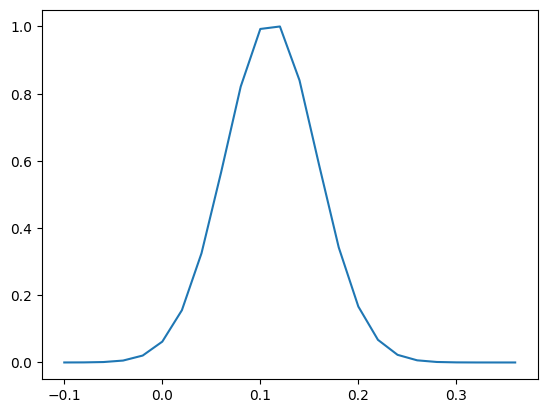

In [14]:
plt.figure()
plt.plot(AIA, like_AIA)
plt.show()

/tmp/ipykernel_2858974/1521224374.py:10: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(colorbar_info)


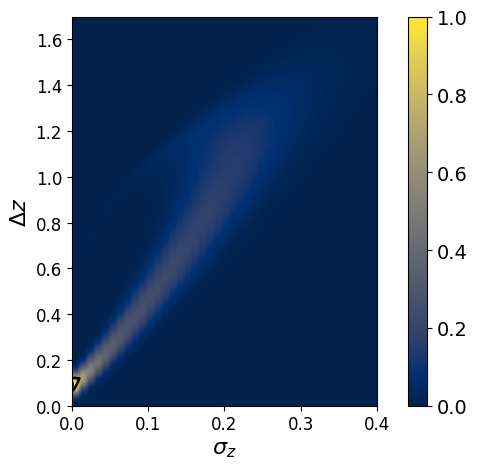

In [6]:
colorbar_info = plt.cm.ScalarMappable(cmap='cividis')
plt.figure()
#interpolation='spline36',
plt.imshow(like_dz_sigz_norm, extent = [0,0.4,0.0,1.7], origin='lower', aspect=0.3, cmap='cividis')
plt.xlabel('$\sigma_z$', fontsize=16)
plt.ylabel('$\Delta z$', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('CDF of $\chi^2$ distribution, $\sigma_z=0$', fontsize=14)
cbar = plt.colorbar(colorbar_info)
cbar.ax.tick_params(labelsize=14)
plt.contour(sigz,delz,  like_dz_sigz_norm, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=2)
#plt.contour(AIA, delz, cdf_grid[:,0,:], [0.95], colors='k', linestyle=':', linewidth=3,)
plt.tight_layout()
#plt.savefig('./cdf_Planck18_sigz=0.png')
plt.show()

/tmp/ipykernel_2858974/2280041031.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(colorbar_info)


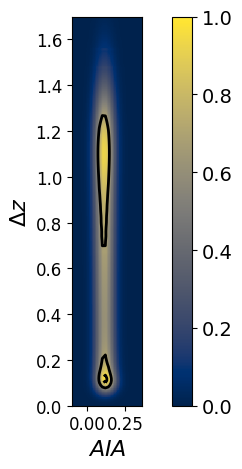

In [7]:
colorbar_info = plt.cm.ScalarMappable(cmap='cividis')
plt.figure()
plt.imshow(like_dz_aia_norm, origin='lower',extent = [-0.1,0.36,0.0, 1.7], aspect=1.5, cmap='cividis')
plt.xlabel('$AIA$', fontsize=16)
plt.ylabel('$\Delta z$', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('CDF of $\chi^2$ distribution, $\sigma_z=0$', fontsize=14)
cbar = plt.colorbar(colorbar_info)
cbar.ax.tick_params(labelsize=14)
plt.contour(AIA,delz,  like_dz_aia_norm, [0.68,0.95],linestyles=['solid','dashed'],colors='k', linewidths=2)
#plt.contour(AIA, delz, cdf_grid[:,0,:], [0.95], colors='k', linestyle=':', linewidth=3,)
plt.tight_layout()
#plt.savefig('./cdf_Planck18_sigz=0.png')
plt.show()

/tmp/ipykernel_2858974/2856624056.py:9: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(colorbar_info)


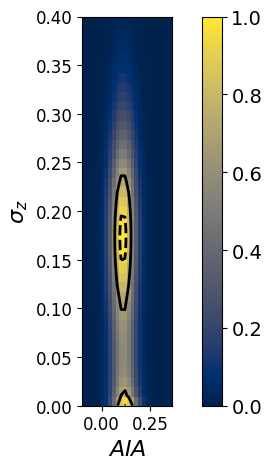

In [8]:
colorbar_info = plt.cm.ScalarMappable(cmap='cividis')
plt.figure()
plt.imshow(like_sigz_aia_norm, origin='lower', extent = [-0.1,0.36, 0.0,0.4], aspect=5, cmap='cividis')
plt.xlabel('$AIA$', fontsize=16)
plt.ylabel('$\sigma_z$', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
#plt.title('CDF of $\chi^2$ distribution, $\sigma_z=0$', fontsize=14)
cbar = plt.colorbar(colorbar_info)
cbar.ax.tick_params(labelsize=14)
plt.contour(AIA,sigz,  like_sigz_aia_norm, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=2)
#plt.contour(AIA, delz, cdf_grid[:,0,:], [0.95], colors='k', linestyle=':', linewidth=3,)
plt.tight_layout()
#plt.savefig('./cdf_Planck18_sigz=0.png')
plt.show()

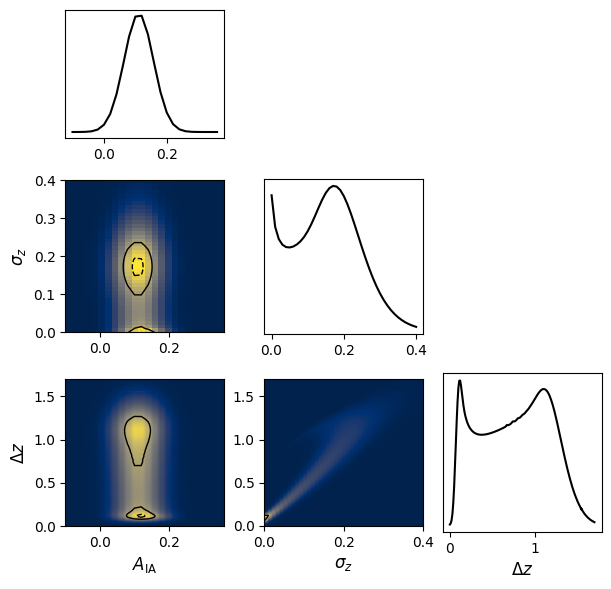

In [58]:
colorbar_info = plt.cm.ScalarMappable(cmap='cividis')
# Now actually make these into a triangle plot
fig, axs = plt.subplots(3, 3,figsize=[6,6], layout="constrained")
fig.delaxes(axs[0][1])
fig.delaxes(axs[0][2])
fig.delaxes(axs[1][2])
axs[0,0].plot(AIA, like_AIA, color='k')
axs[0,0].set_yticks([])
axs[0,0].set_aspect(0.37)
axs[0,0].tick_params(labelsize=10)
axs[1, 0].imshow(like_sigz_aia_norm, origin='lower', extent = [-0.1,0.36, 0.0,0.4], aspect=1.1, cmap='cividis')
#axs[0,0].set_xlabel('$AIA$', fontsize=16)
axs[1,0].set_ylabel('$\sigma_z$', fontsize=12)
axs[1,0].contour(AIA,sigz,  like_sigz_aia_norm, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[1,0].tick_params(labelsize=10)
axs[1,1].plot(sigz, like_sigz, color='k')
axs[1,1].set_yticks([])
axs[1,1].set_aspect(0.4)
axs[1,1].tick_params(labelsize=10)
axs[2, 0].imshow(like_dz_aia_norm, origin='lower',extent = [-0.1,0.36,0.0, 1.7], aspect=0.25, cmap='cividis')
axs[2,0].set_xlabel('$A_{\\rm IA}$', fontsize=12)
axs[2,0].set_ylabel('$\Delta z$', fontsize=12)
axs[2,0].contour(AIA,delz,  like_dz_aia_norm, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[2,0].tick_params(labelsize=10)
axs[2,1].imshow(like_dz_sigz_norm, extent = [0,0.4,0.0,1.7], origin='lower', aspect=0.217, cmap='cividis')
axs[2,1].set_xlabel('$\sigma_z$', fontsize=12)
#axs[1,1].set_ylabel('$\Delta z$', fontsize=16)
axs[2,1].contour(sigz,delz,  like_dz_sigz_norm, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[2,1].tick_params(labelsize=10)
axs[2,2].plot(delz, like_dz, color='k')
axs[2,2].set_yticks([])
axs[2,2].set_aspect(1.7)
axs[2,2].set_xlabel('$\Delta z$', fontsize=12)
axs[1,1].tick_params(labelsize=10)
#plt.constrained_layout('True')
#plt.tight_layout()
plt.savefig('./triangle_plot_full_distributions.pdf')


In [40]:
# Interpolate to get smoothe contours

# 2D

plot_sigz_ai = like_sigz_aia_norm[0:6,5:16]
sigz_ai_spline = RectBivariateSpline(sigz[0:6], AIA[5:16], plot_sigz_ai)

sigz_plot = np.linspace(0, 0.05, 100)
AIA_plot = np.linspace(0,0.2, 100)
sigz_ai_smooth = np.zeros((len(sigz_plot), len(AIA_plot)))
for si in range(0,len(sigz_plot)):
    for ai in range(0,len(AIA_plot)):
        sigz_ai_smooth[si,ai] = sigz_ai_spline.ev(sigz_plot[si], AIA_plot[ai])

plot_dz_ai =like_dz_aia_norm[0:31,5:16]
dz_ai_spline = RectBivariateSpline(delz[0:31], AIA[5:16], plot_dz_ai)

delz_plot = np.linspace(0, 0.3, 100)
delz_ai_smooth = np.zeros((len(delz_plot), len(AIA_plot)))
for di in range(0,len(delz_plot)):
    for ai in range(0,len(AIA_plot)):
        delz_ai_smooth[di,ai] = dz_ai_spline.ev(delz_plot[di], AIA_plot[ai])

plot_dz_sigz =like_dz_sigz_norm[0:31,0:6]
dz_sigz_spline = RectBivariateSpline(delz[0:31], sigz[0:6], plot_dz_sigz)

delz_sigz_smooth = np.zeros((len(delz_plot), len(sigz_plot)))
for di in range(0,len(delz_plot)):
    for si in range(0,len(sigz_plot)):
        delz_sigz_smooth[di,si] = dz_sigz_spline.ev(delz_plot[di], sigz_plot[si])

In [43]:
# 1D:

delz_spline = interp1d(delz, like_dz)
delz_smooth = delz_spline(delz_plot)

ai_spline = interp1d(AIA, like_AIA)
ai_smooth = ai_spline(AIA_plot)

sigz_plot_1D = np.linspace(0.0001, 0.05,100)
sigz_spline = interp1d(sigz, like_sigz)
sigz_smooth = sigz_spline(sigz_plot_1D)

In [76]:
sigz_ai_smooth.shape

(100, 100)

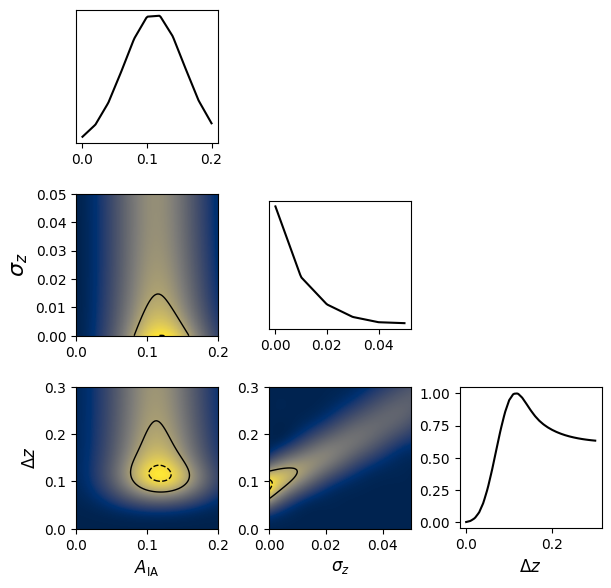

In [57]:
colorbar_info = plt.cm.ScalarMappable(cmap='cividis')
# Now actually make these into a triangle plot
fig, axs = plt.subplots(3, 3,figsize=[6,6], layout="constrained")
fig.delaxes(axs[0][1])
fig.delaxes(axs[0][2])
fig.delaxes(axs[1][2])
axs[0,0].plot(AIA_plot, ai_smooth, color='k')
axs[0,0].set_yticks([])
axs[0,0].set_aspect(0.2)
axs[0,0].tick_params(labelsize=10)
axs[1,0].imshow(sigz_ai_smooth, origin='lower', extent = [0.0, 0.2, 0.0,0.05], aspect=4.0, cmap='cividis')#, interpolation='spline36')
axs[1,0].set_ylabel('$\sigma_z$', fontsize=16)
axs[1,0].contour(AIA_plot,sigz_plot, sigz_ai_smooth, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[1,0].tick_params(labelsize=10)
axs[1,1].plot(sigz_plot_1D, sigz_smooth, color='k')
axs[1,1].set_yticks([])
axs[1,1].set_aspect(0.05/0.4)
axs[1,1].tick_params(labelsize=10)
axs[2, 0].imshow(delz_ai_smooth, origin='lower',extent = [0.0,0.2,0.0, 0.3], aspect=0.66667, cmap='cividis',  interpolation='spline36')
axs[2,0].set_xlabel('$A_{\\rm IA}$', fontsize=12)
axs[2,0].set_ylabel('$\Delta z$', fontsize=12)
axs[2,0].contour(AIA_plot,delz_plot, delz_ai_smooth, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[2,0].tick_params(labelsize=10)
axs[2,1].imshow(delz_sigz_smooth, extent = [0,0.05,0.0,0.3], origin='lower', aspect=5./30., cmap='cividis', interpolation='spline36')
axs[2,1].set_xlabel('$\sigma_z$', fontsize=12)
#axs[1,1].set_ylabel('$\Delta z$', fontsize=16)
axs[2,1].contour(sigz_plot,delz_plot,  delz_sigz_smooth, [0.68,0.95], linestyles=['solid','dashed'],colors='k', linewidths=1)
axs[2,1].tick_params(labelsize=10)
axs[2,2].plot(delz_plot, delz_smooth, color='k')
#axs[2,2].set_yticks([])
axs[2,2].set_aspect(0.3)
axs[2,2].set_xlabel('$\Delta z$', fontsize=12)
#plt.tight_layout()
plt.savefig('./triangle_plot_cutout_smoothed.pdf')

In [10]:
(52+55)/2.

53.5

In [30]:
like_dz_aia_norm[-1,:]

array([2.60821055e-06, 1.63268238e-05, 8.51121740e-05, 3.69498418e-04,
       1.33587066e-03, 4.02204724e-03, 1.00846507e-02, 2.10574360e-02,
       3.66168569e-02, 5.30258434e-02, 6.39477190e-02, 6.42234286e-02,
       5.37146657e-02, 3.74130602e-02, 2.17012404e-02, 1.04827893e-02,
       4.21696634e-03, 1.41271448e-03, 3.94130139e-04, 9.15705641e-05,
       1.77175281e-05, 2.85483739e-06, 3.83081014e-07, 4.28085870e-08])

In [29]:
like_dz_sigz_norm[10,:]

array([9.81265557e-01, 5.75628734e-01, 2.02755081e-01, 4.36426226e-02,
       6.12955689e-03, 5.96567008e-04, 4.23334989e-05, 2.28430115e-06,
       9.70270291e-08, 3.33822707e-09, 9.52666579e-11, 2.30040625e-12,
       4.77955231e-14, 8.66698778e-16, 1.38843455e-17, 1.98560861e-19,
       2.55793816e-21, 2.99167802e-23, 3.19839979e-25, 3.14440852e-27,
       2.85767947e-29, 2.41193680e-31, 1.89833296e-33, 1.39832082e-35,
       9.67090143e-38, 6.29790917e-40, 3.87171470e-42, 2.25204280e-44,
       1.24193657e-46, 6.50520453e-49, 3.24165585e-51, 1.53903375e-53,
       6.97057363e-56, 3.01530762e-58, 1.24705826e-60, 4.93553326e-63,
       1.87080883e-65, 6.79654443e-68, 2.36804031e-70, 7.91730801e-73,
       2.54137268e-75])